In [21]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [24]:
url = 'https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/Glass%20Identification/Glass%20Identification.csv'
df = pd.read_csv(url)
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [29]:

# Rename the columns
df.columns = [
    'Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass'
]
print(df.columns)

Index(['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of glass'],
      dtype='object')


In [27]:
print(df.head())

   Id number       RI     Na    Mg    Al     Si     K    Ca   Ba    Fe  \
0          2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00   
1          3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00   
2          4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00   
3          5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00   
4          6  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.0  0.26   

   Type of glass  
0              1  
1              1  
2              1  
3              1  
4              1  


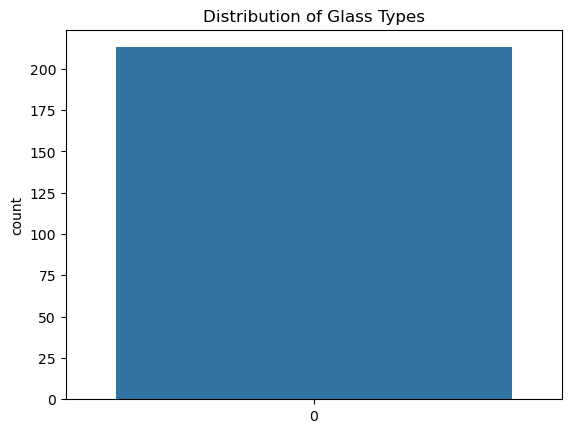

In [33]:
sns.countplot(df['Type of glass'])
plt.title('Distribution of Glass Types')
plt.show()

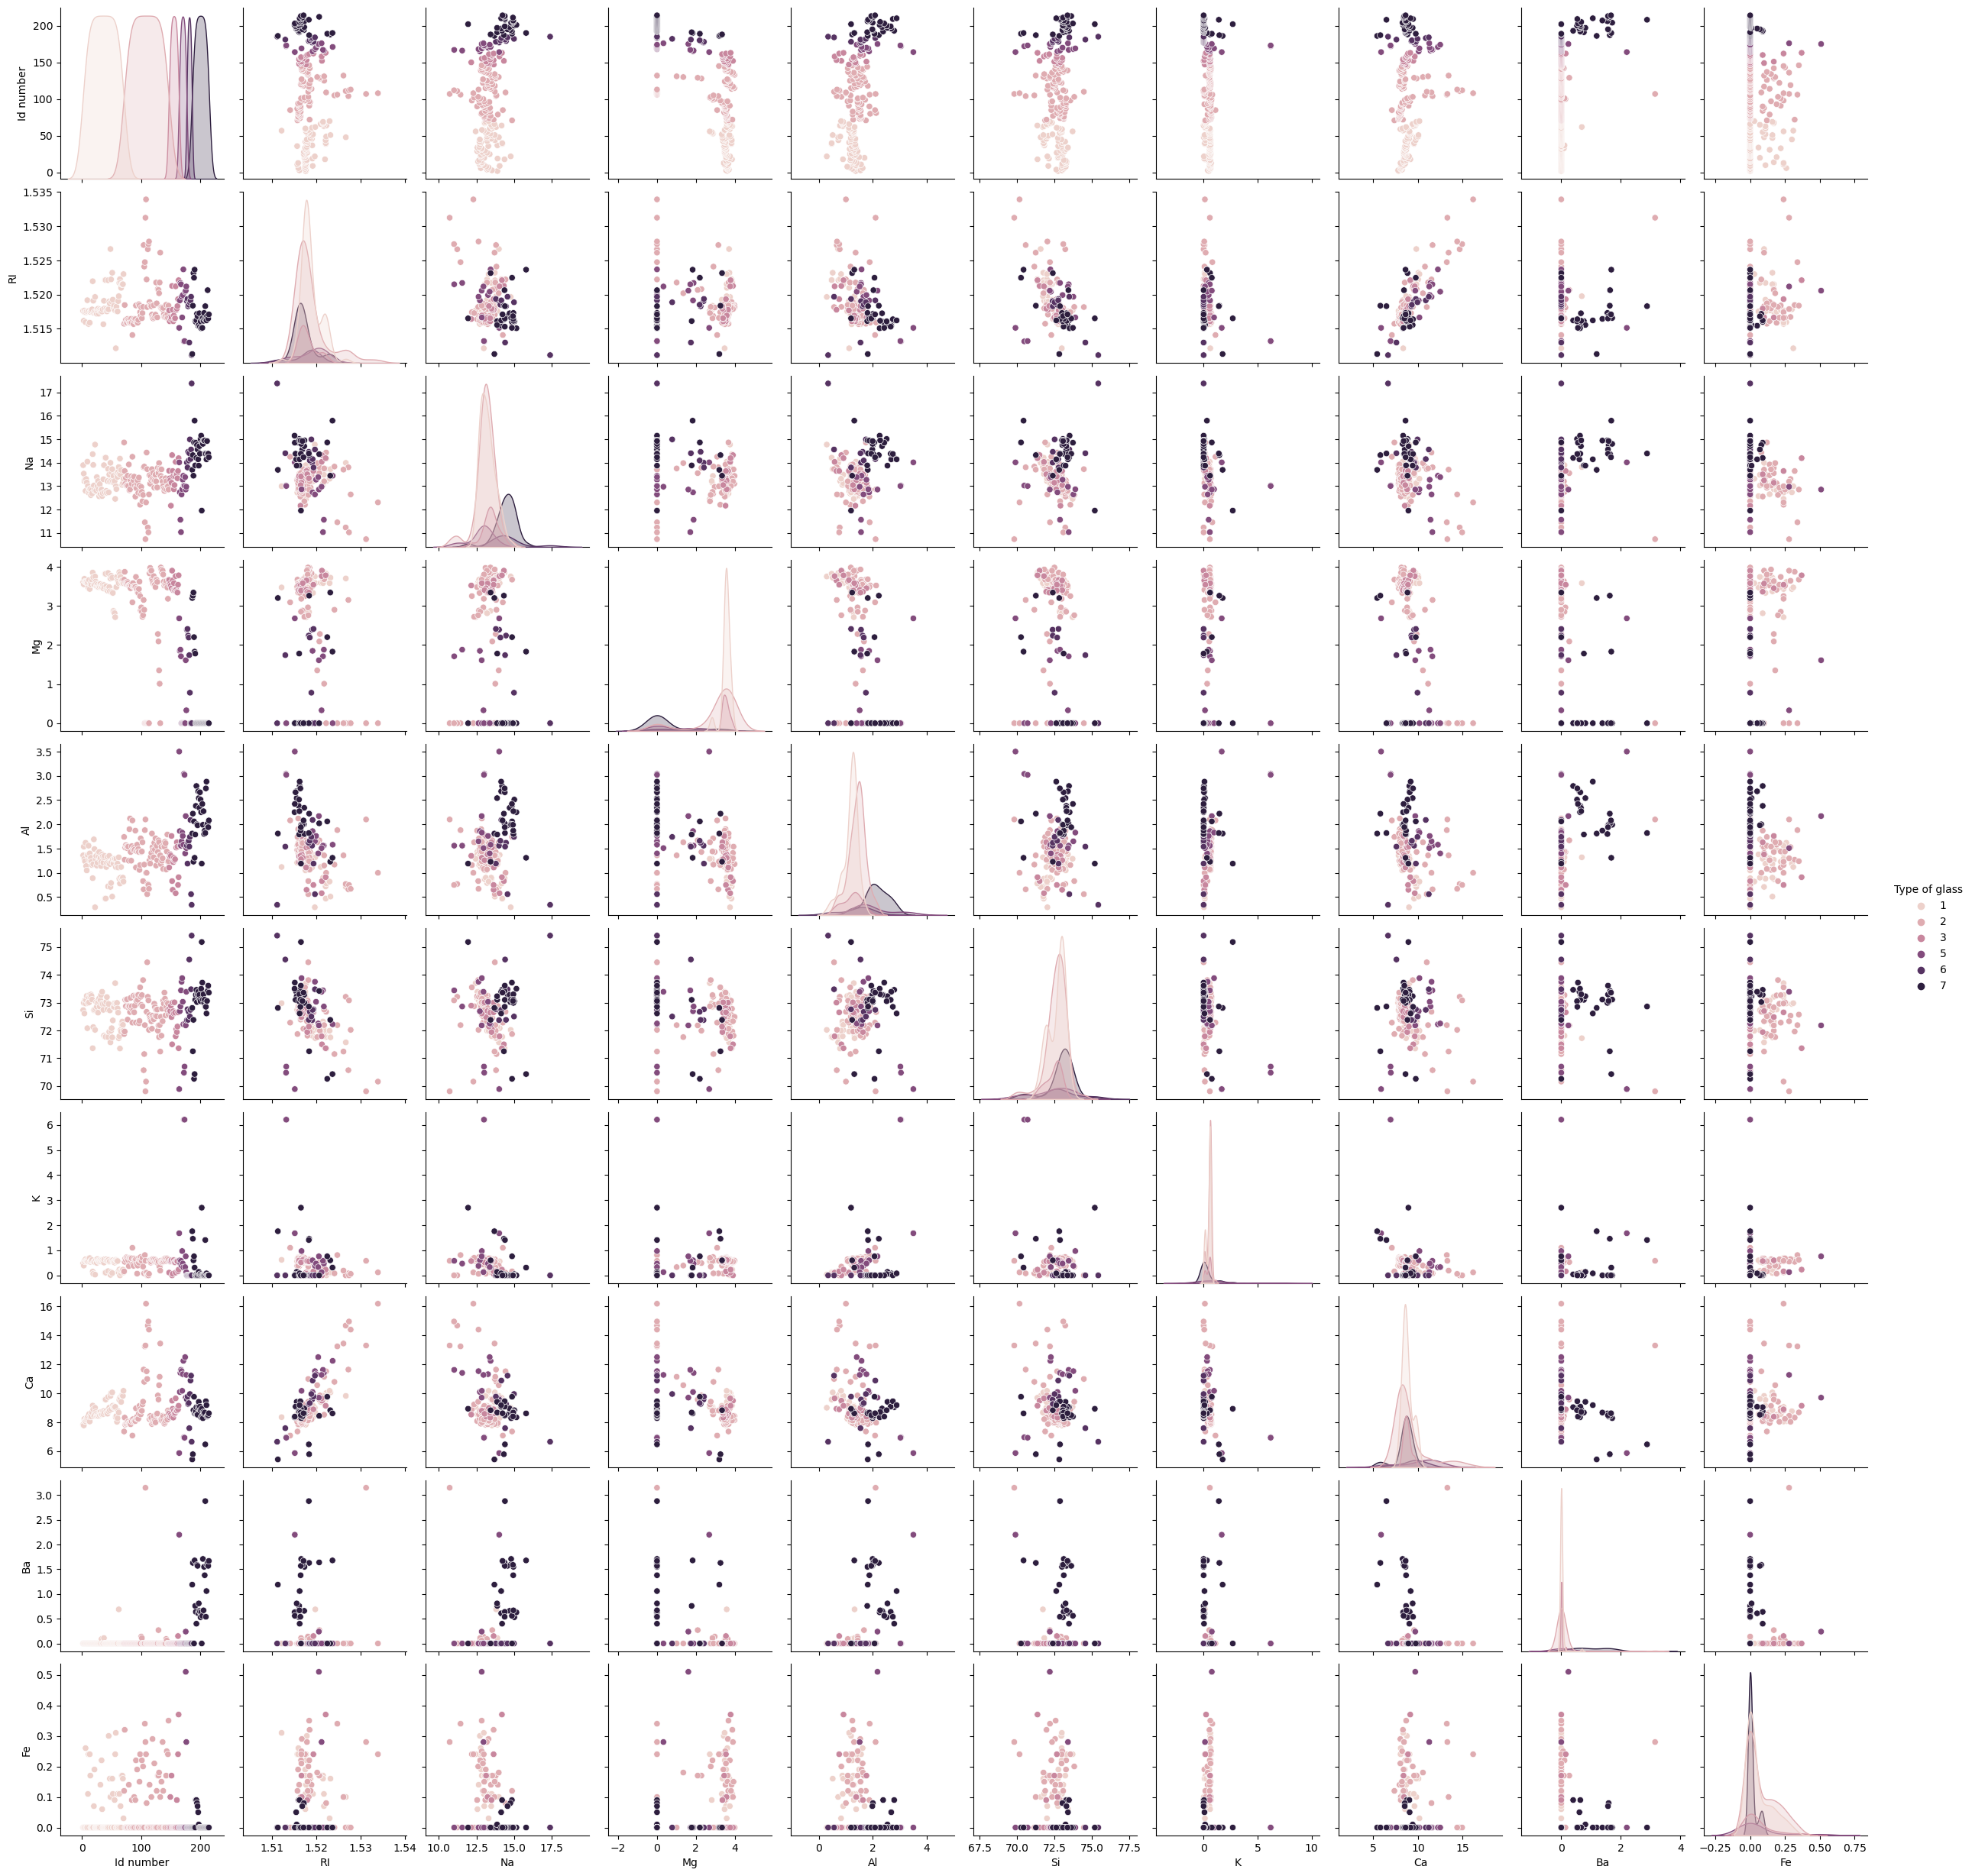

In [34]:
# Pair plot of features
sns.pairplot(df, hue='Type of glass')
plt.show()

In [35]:
# Features and target variable
X = df.drop(columns=['Id number', 'Type of glass'])
y = df['Type of glass']

In [36]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [37]:
# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
# Predictions
y_pred = model.predict(X_test)

In [45]:
# Evaluation
print('Accuracy:', accuracy_score(y_test, y_pred)*100)
print(classification_report(y_test, y_pred))

Accuracy: 73.4375
              precision    recall  f1-score   support

           1       0.67      0.78      0.72        18
           2       0.70      0.67      0.68        24
           3       1.00      0.50      0.67         4
           5       0.57      1.00      0.73         4
           6       1.00      0.67      0.80         3
           7       1.00      0.82      0.90        11

    accuracy                           0.73        64
   macro avg       0.82      0.74      0.75        64
weighted avg       0.77      0.73      0.74        64

